# Fire Ecology Plotting
#### NCSU Land Change Lab
(last Updated 9/13/24)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Change working directory to wherever the data are stored
import os
os.chdir('/Users/katedeanmckinney/Desktop/ncsu/PlotData')

In [3]:
#Total = pd.read_csv('Total_Fuels.csv')
CWD = pd.read_csv('CWD_Fuels_Data.csv')
FWD = pd.read_csv('FWD_Fuels_Data.csv')
Litter = pd.read_csv('Litter_Fuels_Data_Some.csv')
Duff = pd.read_csv('Duff_Fuels_Data.csv')

## Median Values

In [6]:
file_paths = [
    'CWD_Fuels_Data.csv',
    'Duff_Fuels_Data.csv',
    'FWD_Fuels_Data.csv',
    'Litter_Fuels_Data_Some.csv',
]

In [7]:
# Load each CSV file and calculate the median of each column

median_data = {}
for file_path in file_paths:
    df = pd.read_csv(file_path)
    median_values = df.median()
    median_data[file_path.split('/')[-1]] = median_values

In [8]:
median_df = pd.DataFrame(median_data)

In [10]:
median_df.columns = ["CWD Median", "Duff Median", "FWD Median", "Litter Median"]

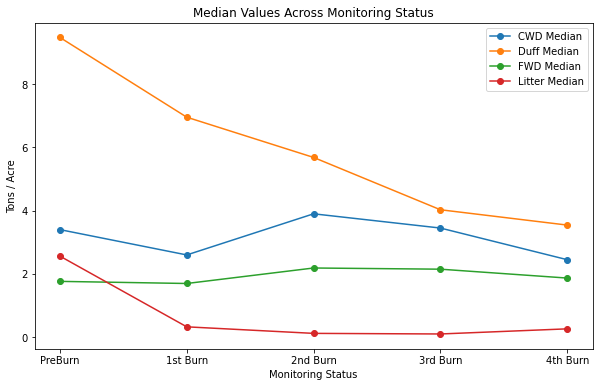

In [11]:
#MEDIAN VALUES ACCROSS MONITORING STATUSES
plt.figure(figsize=(10, 6))

# Plotting each column as its own line
for column in median_df.columns:
    plt.plot(median_df.index, median_df[column], marker='o', label=column)

# Adding labels and title
plt.xlabel('Monitoring Status')
plt.ylabel('Tons / Acre')
plt.title('Median Values Across Monitoring Status')
plt.legend()
plt.grid(False)
plt.savefig('MedianValues.jpg')
plt.show()

## All Litter At All Monitoring Statuses

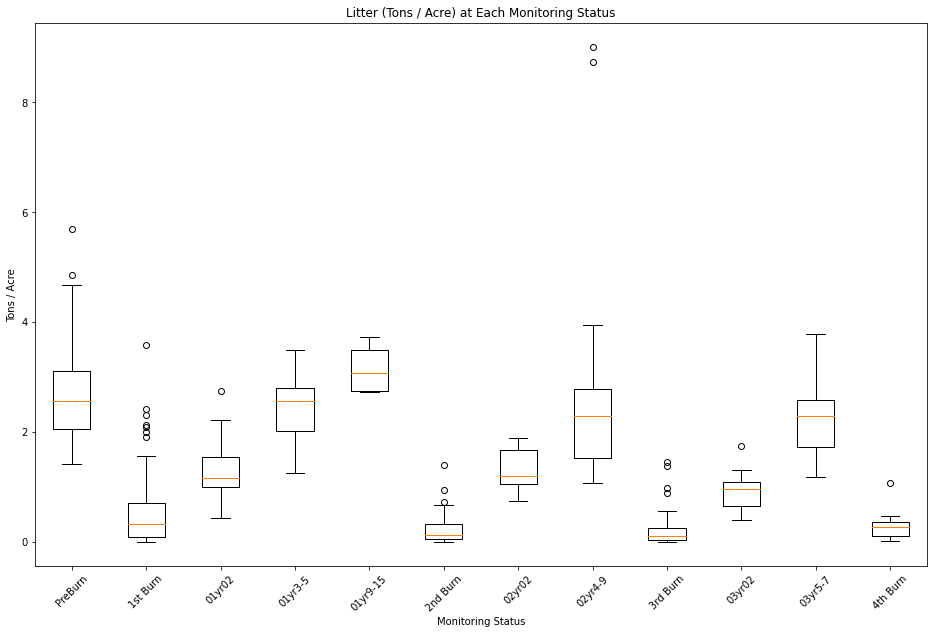

In [13]:
# Load the latest Excel file provided
file_path = 'Litter_Fuels_Data_All.csv'
All_Litter = pd.read_csv(file_path)

# Prepare the data
data = [All_Litter[col].dropna() for col in All_Litter.columns[1:]]  # Exclude the first column

# Plot all box and whisker plots on one figure
plt.figure(figsize=(16, 10))
plt.boxplot(data, labels=All_Litter.columns[1:])
plt.ylabel('Tons / Acre')
plt.xlabel('Monitoring Status')
plt.title('Litter (Tons / Acre) at Each Monitoring Status')
plt.xticks(rotation=45)
plt.grid(False)

plt.savefig('LitterAll.jpg')

# Show the combined plot
plt.show()

## Stacked Bar Plot at Each Monitoring Status

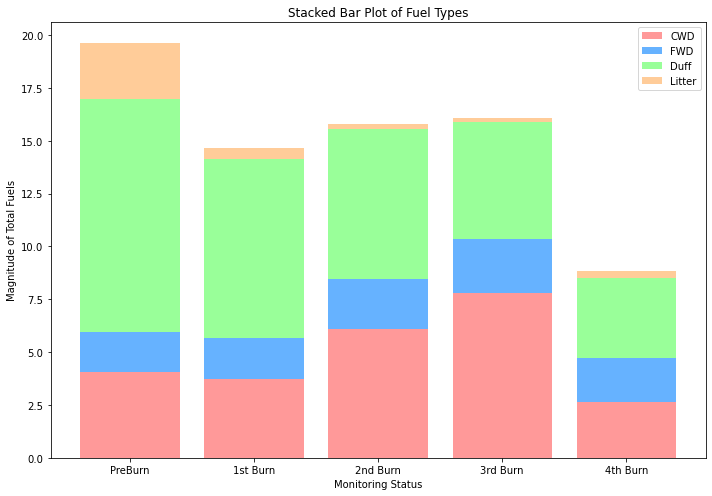

In [15]:
cwd_means = CWD.mean()
fwd_means = FWD.mean()
duff_means = Duff.mean()
litter_means = Litter.mean()

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(10, 7))

# Monitoring status labels
monitoring_status = ["PreBurn", "1st Burn", "2nd Burn", "3rd Burn", "4th Burn"]

# Plot the stacked bars using the proportions
ax.bar(monitoring_status, cwd_means, label='CWD', color='#FF9999')
ax.bar(monitoring_status, fwd_means, bottom=cwd_means, label='FWD', color='#66B2FF')
ax.bar(monitoring_status, duff_means, bottom=cwd_means+fwd_means, label='Duff', color='#99FF99')
ax.bar(monitoring_status, litter_means, bottom=cwd_means+fwd_means+ duff_means, label='Litter', color='#FFCC99')

# Labels and title
ax.set_xlabel('Monitoring Status')
ax.set_ylabel('Magnitude of Total Fuels')
ax.set_title('Stacked Bar Plot of Fuel Types')

# Add legend
ax.legend()

plt.tight_layout()
plt.savefig('BarPlot1.jpg')
plt.show()

## Proportional Bar Plot (Not Using)

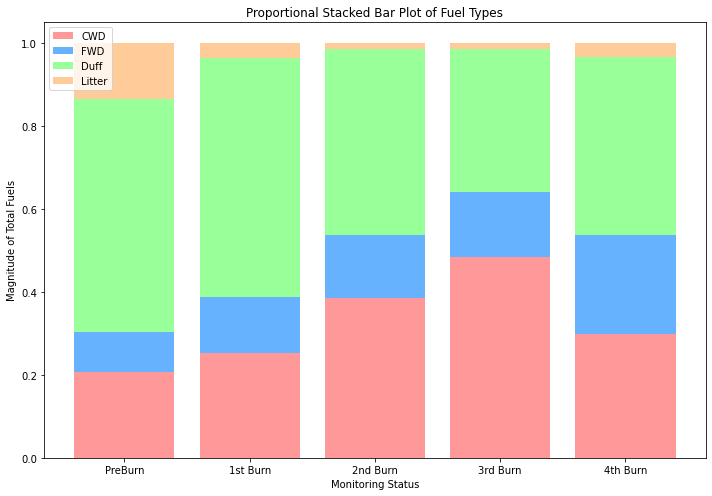

In [17]:
# Calculate total means for each burn (sum of CWD, FWD, Duff, Litter means)
total_means = cwd_means + fwd_means + duff_means + litter_means

# Calculate proportions for each fuel type
prop_cwd = cwd_means / total_means
prop_fwd = fwd_means / total_means
prop_duff = duff_means / total_means
prop_litter = litter_means / total_means

# Create the proportional stacked bar plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the stacked bars using the proportions
ax.bar(monitoring_status, prop_cwd, label='CWD', color='#FF9999')
ax.bar(monitoring_status, prop_fwd, bottom=prop_cwd, label='FWD', color='#66B2FF')
ax.bar(monitoring_status, prop_duff, bottom=prop_cwd+prop_fwd, label='Duff', color='#99FF99')
ax.bar(monitoring_status, prop_litter, bottom=prop_cwd+prop_fwd+prop_duff, label='Litter', color='#FFCC99')

# Labels and title
ax.set_xlabel('Monitoring Status')
ax.set_ylabel('Magnitude of Total Fuels')
ax.set_title('Proportional Stacked Bar Plot of Fuel Types')

# Add legend
ax.legend()

plt.tight_layout()
plt.savefig('BarPlot2.jpg')
plt.show()

In [18]:
# Restructure the datasets for easier plotting
def prepare_data_for_plot(fuel_data, fuel_type):
    """
    Reshape the dataset to long format for easy plotting.
    """
    long_format = fuel_data.melt(id_vars=["Plot"], var_name="Burn", value_name=fuel_type)
    return long_format

# Prepare each fuel type data
cwd_long = prepare_data_for_plot(CWD, "CWD")
fwd_long = prepare_data_for_plot(FWD, "FWD")
duff_long = prepare_data_for_plot(Duff, "Duff")
litter_long = prepare_data_for_plot(Litter, "Litter")

# Merge all fuel types into one dataframe
merged_data = cwd_long.merge(fwd_long, on=["Plot", "Burn"]).merge(duff_long, on=["Plot", "Burn"]).merge(litter_long, on=["Plot", "Burn"])

# Create the boxplot
plt.figure(figsize=(12, 8))

# Order of the burns on x-axis
burn_order = ["PreBurn", "1st Burn", "2nd Burn", "3rd Burn", "4th Burn"]

# Create the plot
merged_data_long = merged_data.melt(id_vars=["Plot", "Burn"], var_name="Fuel Type", value_name="Value")

<Figure size 864x576 with 0 Axes>

## Box Plot with Secondary y-axis (1st option)

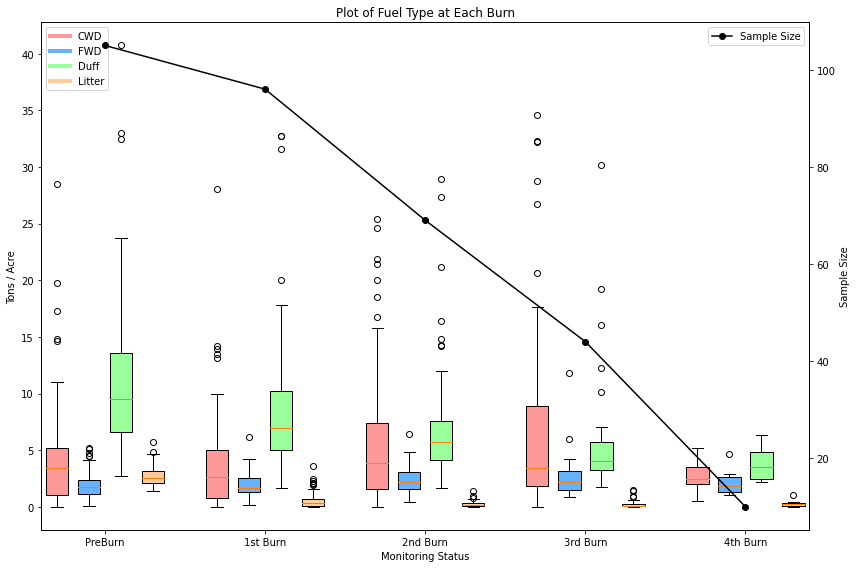

In [19]:
# Define sample sizes for each burn
sample_sizes = {"PreBurn": 105, "1st Burn": 96, "2nd Burn": 69, "3rd Burn": 44, "4th Burn": 10}
sample_size_values = list(sample_sizes.values())

# Create the plot with color-coded boxplots and a legend
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Colors for CWD, FWD, Duff, Litter

# Create the first plot with a line graph showing sample sizes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Boxplot data
for i, burn in enumerate(burn_order):
    data_to_plot = merged_data_long[merged_data_long["Burn"] == burn]
    for j, fuel in enumerate(["CWD", "FWD", "Duff", "Litter"]):
        ax1.boxplot(
            data_to_plot[data_to_plot["Fuel Type"] == fuel]["Value"].dropna(),
            positions=[i * 5 + j],
            widths=0.7,
            patch_artist=True,  # To color the boxes
            boxprops=dict(facecolor=colors[j])  # Color each box
        )

# Customizing ticks and labels
ax1.set_xticks([i * 5 + 1.5 for i in range(len(burn_order))])
ax1.set_xticklabels(burn_order)
ax1.set_xlabel("Monitoring Status")
ax1.set_ylabel("Tons / Acre")
ax1.set_title("Plot of Fuel Type at Each Burn")

# Adding second y-axis for sample size
ax2 = ax1.twinx()
ax2.plot([i * 5 + 1.5 for i in range(len(burn_order))], sample_size_values, color='black', marker='o', linestyle='-', label="Sample Size")
ax2.set_ylabel('Sample Size')
ax2.legend(loc="upper right")

# Add legend for the color-coded boxplots
handles = [plt.Line2D([0], [0], color=colors[k], lw=4) for k in range(4)]
ax1.legend(handles, ["CWD", "FWD", "Duff", "Litter"], loc="upper left")

plt.tight_layout()
plt.savefig('BoxPlot1.jpg')
plt.show()

## Box Plot with Secondary y-axis (2nd option)

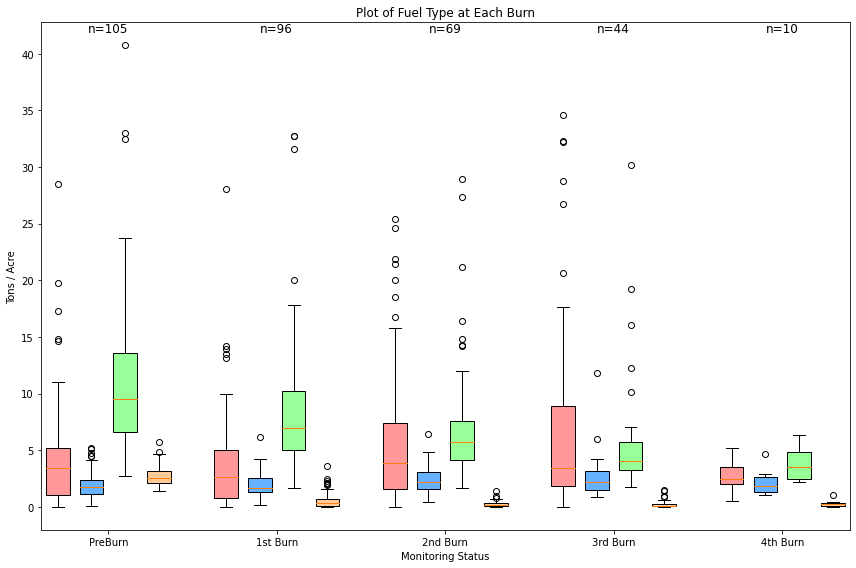

In [20]:
# Create the second plot with sample size annotations above each monitoring status
fig, ax1 = plt.subplots(figsize=(12, 8))

# Boxplot data with colors
for i, burn in enumerate(burn_order):
    data_to_plot = merged_data_long[merged_data_long["Burn"] == burn]
    for j, fuel in enumerate(["CWD", "FWD", "Duff", "Litter"]):
        ax1.boxplot(
            data_to_plot[data_to_plot["Fuel Type"] == fuel]["Value"].dropna(),
            positions=[i * 5 + j],
            widths=0.7,
            patch_artist=True,  # To color the boxes
            boxprops=dict(facecolor=colors[j])  # Color each box
        )
        
# Customizing ticks and labels
ax1.set_xticks([i * 5 + 1.5 for i in range(len(burn_order))])
ax1.set_xticklabels(burn_order)
ax1.set_xlabel("Monitoring Status")
ax1.set_ylabel("Tons / Acre")
ax1.set_title("Plot of Fuel Type at Each Burn")

# Adding sample size annotations
for i, burn in enumerate(burn_order):
    ax1.text(i * 5 + 1.5, ax1.get_ylim()[1], f"n={sample_sizes[burn]}", ha='center', va='top', fontsize=12)

plt.tight_layout()
plt.savefig('BoxPlot2.jpg')
plt.show()